<h1>United Kingdom Road Accident Data Analysis</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
accidents = pd.read_csv('datasets\\accident_data.csv')

In [4]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [7]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])

In [9]:
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])

In [10]:
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])

In [11]:
accidents['Road_Type'] = accidents['Road_Type'].fillna('unknown')

In [12]:
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('unaccounted')

In [13]:
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])

In [14]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Data Type</h1>

In [15]:
accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [16]:
accidents['Accident_Severity']=accidents['Accident_Severity'].astype('category')

In [17]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [18]:
accidents['Light_Conditions']=accidents['Light_Conditions'].astype('category')

In [19]:
accidents['District Area']=accidents['District Area'].astype('category')

In [20]:
accidents['Road_Surface_Conditions']=accidents['Road_Surface_Conditions'].astype('category')

In [21]:
accidents['Road_Type']=accidents['Road_Type'].astype('category')

In [22]:
accidents['Urban_or_Rural_Area']=accidents['Urban_or_Rural_Area'].astype('category')

In [23]:
accidents['Weather_Conditions']=accidents['Weather_Conditions'].astype('category')

In [24]:
accidents['Vehicle_Type']=accidents['Vehicle_Type'].astype('category')

In [25]:
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [26]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown,Urban,unaccounted,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown,Urban,unaccounted,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>1# What Vehicle Type has the most accidents?</h1>

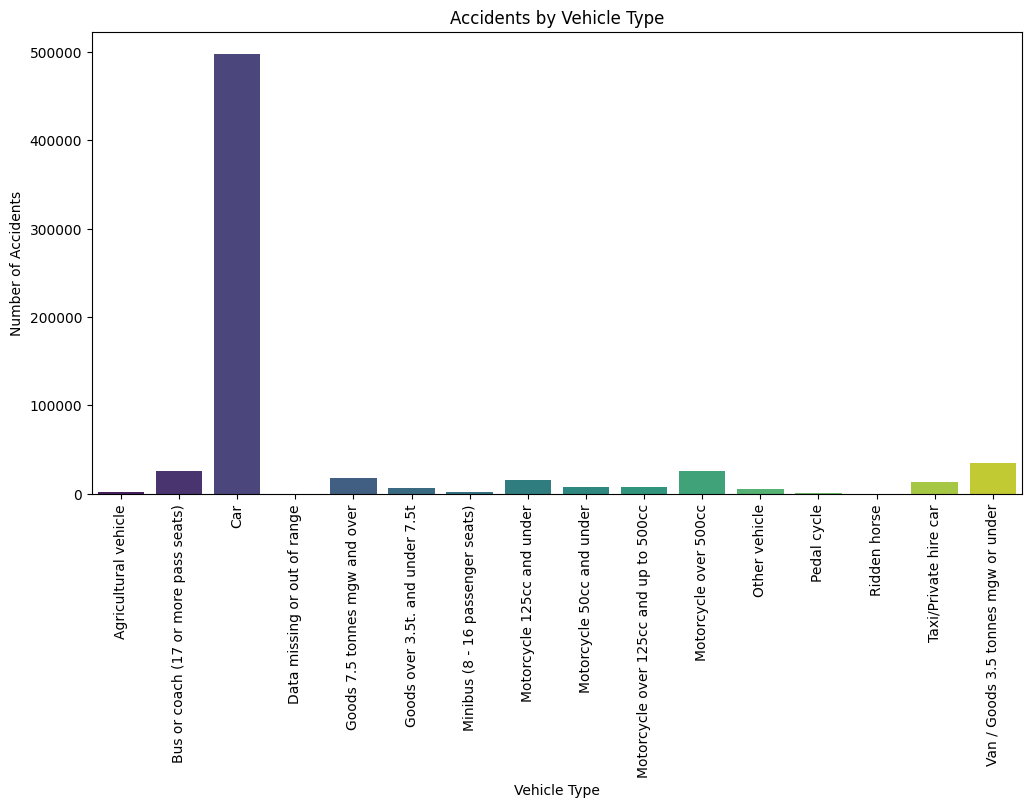

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count vehicle type occurrences
vehicle_counts = accidents["Vehicle_Type"].value_counts()

# Plot vehicle type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Vehicle Type")
plt.show()


In [29]:
Ftl = accidents[accidents['Accident_Severity']=='Fatal']
Srs = accidents[accidents['Accident_Severity']=='Serious']
Slt = accidents[accidents['Accident_Severity']=='Slight']

In [30]:
Ftl['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

In [31]:
Srs['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     66461
Van / Goods 3.5 tonnes mgw or under      4554
Motorcycle over 500cc                    3457
Bus or coach (17 or more pass seats)     3373
Goods 7.5 tonnes mgw and over            2321
Name: count, dtype: int64

In [32]:
Slt['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     424954
Van / Goods 3.5 tonnes mgw or under      29139
Bus or coach (17 or more pass seats)     22180
Motorcycle over 500cc                    21861
Goods 7.5 tonnes mgw and over            14770
Name: count, dtype: int64

In [33]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [34]:
accidents['Vehicle_Type'].value_counts().head(10)

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Name: count, dtype: int64

In [35]:
accidents['Vehicle_Type'].value_counts().sum()

np.int64(660679)

<h2>Insight #1</h2>
<h3>The Vehicle type that has the most accidents was a Car, with a percentage of 75.38 %. As shown in the data that whatever accident severity have, the vehicle type that has the most accident is Car.</h3>

<h1>2# What District Area has the most accidents?</h1>

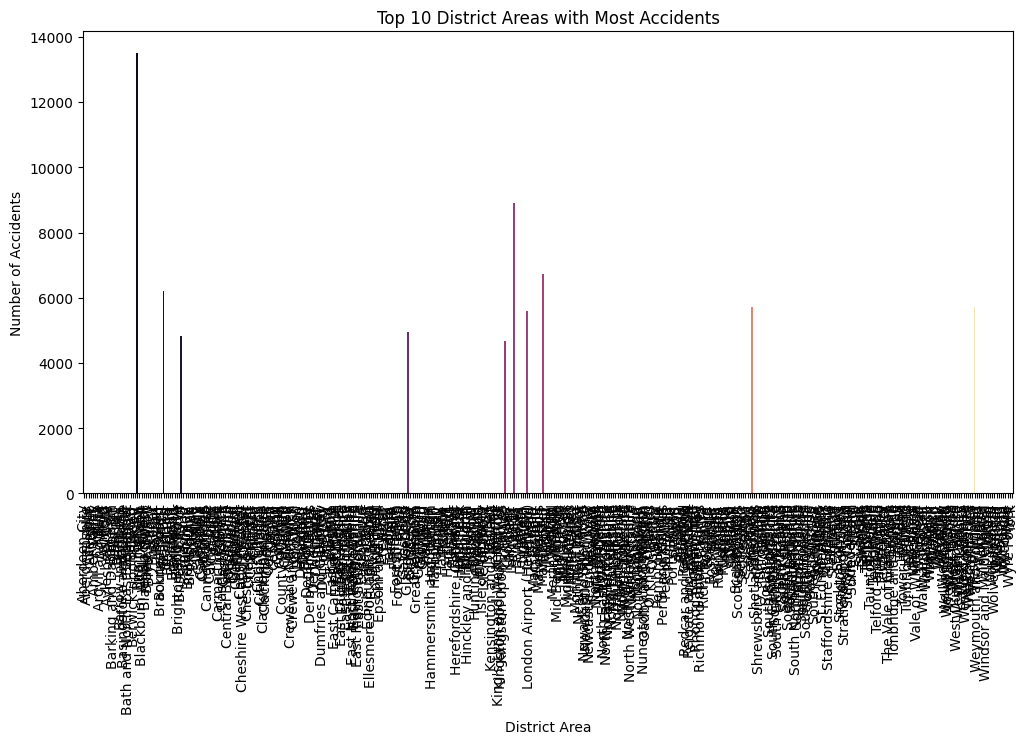

In [36]:

# Count accidents per district area
district_counts = accidents["District Area"].value_counts().head(10)

# Plot district area distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=district_counts.index, y=district_counts.values, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("District Area")
plt.ylabel("Number of Accidents")
plt.title("Top 10 District Areas with Most Accidents")
plt.show()


In [37]:
accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [38]:
accidents['District Area'].value_counts().idxmax()

'Birmingham'

<h2>Insight #2</h2>
<h3>The district Area that has most accidents is the area of Birmingham, with a average of 13,491 (2%). </h3>

<h1>3# What Area has the most accidents? is it Rural or Urban Areas?</h1>

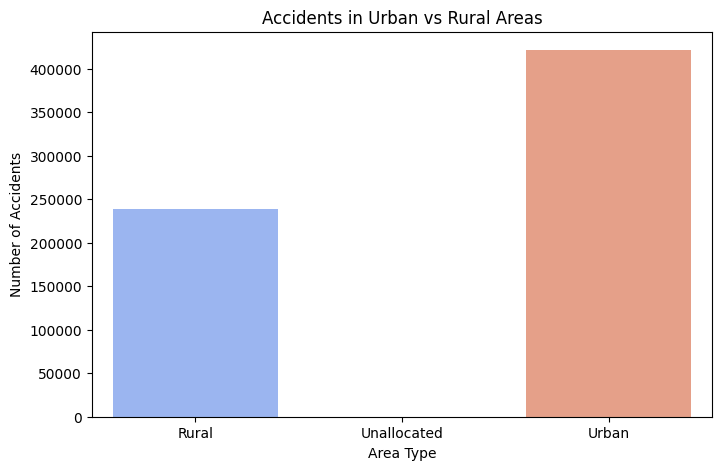

In [39]:

# Count accidents in urban vs rural areas
area_counts = accidents["Urban_or_Rural_Area"].value_counts()

# Plot urban vs rural accidents
plt.figure(figsize=(8, 5))
sns.barplot(x=area_counts.index, y=area_counts.values, palette="coolwarm")
plt.xlabel("Area Type")
plt.ylabel("Number of Accidents")
plt.title("Accidents in Urban vs Rural Areas")
plt.show()


In [40]:
accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [41]:
accidents['Urban_or_Rural_Area'].value_counts().idxmax()

'Urban'

<h2>Insight #3</h2>
<h3>The Area that has most accidents is the Urban Area, with a average of 42,167,8 (63.83%). </h3>

<h1>4# What Area has the most casualties? is it Rural or Urban Area?</h1>

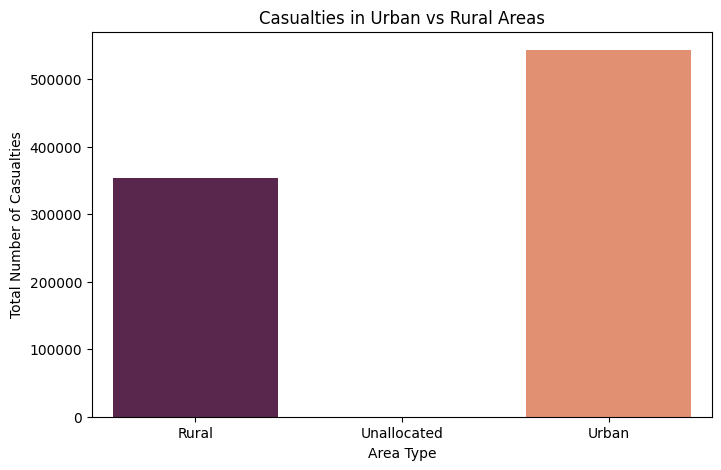

In [42]:

# Sum casualties in urban vs rural areas
casualty_counts = accidents.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].sum()

# Plot urban vs rural casualties
plt.figure(figsize=(8, 5))
sns.barplot(x=casualty_counts.index, y=casualty_counts.values, palette="rocket")
plt.xlabel("Area Type")
plt.ylabel("Total Number of Casualties")
plt.title("Casualties in Urban vs Rural Areas")
plt.show()


In [43]:
accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [44]:
accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean()

Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

In [45]:
accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].mean().idxmax()

'Rural'

<h2>Insight #4</h2>
<h3>As shown in the data result. The area that has the most number of casualties is the Rural Areas which has 36.18% in overrall accidents, even though the Urban Area has the highest accident rate and expected that it is also the highest in casualties, the data shown that it is wrong.</h3>

<h1>5# What exact date has the highest accident rate?</h1>


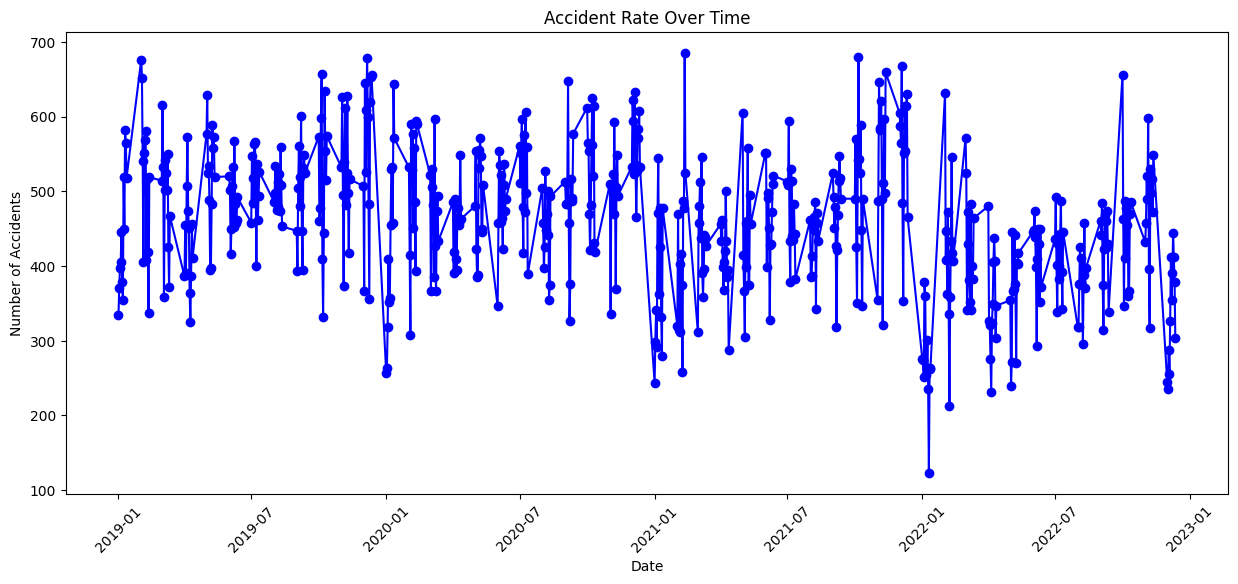

In [46]:

# Convert Accident Date to datetime
accidents["Accident Date"] = pd.to_datetime(accidents["Accident Date"], errors="coerce")

# Count accidents by date
date_counts = accidents["Accident Date"].value_counts().sort_index()

# Plot accidents by date
plt.figure(figsize=(15, 6))
plt.plot(date_counts.index, date_counts.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.title("Accident Rate Over Time")
plt.xticks(rotation=45)
plt.show()


In [47]:
accidents['Accident Date'].value_counts()

Accident Date
2021-02-11    685
2021-10-06    680
2019-12-06    678
2019-02-01    676
2021-12-04    667
             ... 
2022-01-09    236
2022-12-02    236
2022-04-05    231
2022-02-07    213
2022-01-10    123
Name: count, Length: 576, dtype: int64

In [48]:
accidents['Accident Date'].value_counts().idxmax()

Timestamp('2021-02-11 00:00:00')

<h2>Insight #5</h2>
<h3>The exact date that have the highest accident rate is 2021-02-11 with the overall index of 685 accidents that has been encode in the dataset. </h3>

<h1>6# Do certain road surface conditions contribute to higher accident severity?</h1>

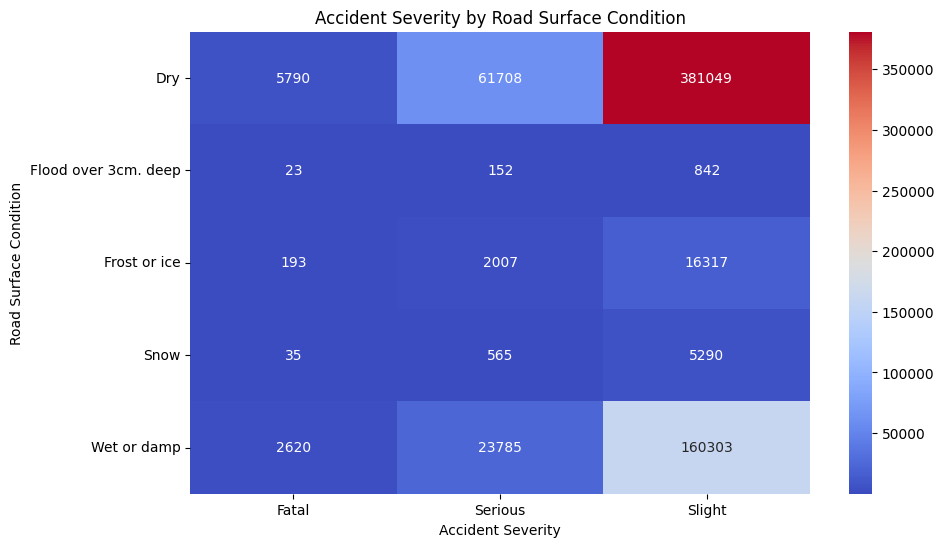

In [49]:

# Count accident severity by road surface condition
severity_road = accidents.groupby(["Road_Surface_Conditions", "Accident_Severity"]).size().unstack()

# Plot heatmap for severity vs road conditions
plt.figure(figsize=(10, 6))
sns.heatmap(severity_road, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Accident Severity")
plt.ylabel("Road Surface Condition")
plt.title("Accident Severity by Road Surface Condition")
plt.show()


In [50]:
Ft = accidents[accidents['Accident_Severity']=='Fatal']
Sr = accidents[accidents['Accident_Severity']=='Serious']
Sl = accidents[accidents['Accident_Severity']=='Slight']

In [51]:
Ft['Road_Surface_Conditions'].value_counts().nlargest(5)

Road_Surface_Conditions
Dry                     5790
Wet or damp             2620
Frost or ice             193
Snow                      35
Flood over 3cm. deep      23
Name: count, dtype: int64

In [52]:
Sr['Road_Surface_Conditions'].value_counts().nlargest(5)

Road_Surface_Conditions
Dry                     61708
Wet or damp             23785
Frost or ice             2007
Snow                      565
Flood over 3cm. deep      152
Name: count, dtype: int64

In [53]:
Sl['Road_Surface_Conditions'].value_counts().nlargest(5)

Road_Surface_Conditions
Dry                     381049
Wet or damp             160303
Frost or ice             16317
Snow                      5290
Flood over 3cm. deep       842
Name: count, dtype: int64

<h2>Insight #6</h2>
<h3>As shown in this data, yes certain road conditions affect the higher accident severity, and most of people think that in the wet or dame road surface has the highest accident severity, but as the data shown the highest rate in the 3 accident severity is the Dry road surface.  </h3>

<h1>7# Does the Light Conditions affects the Accident Severity?</h1>

<Figure size 1200x600 with 0 Axes>

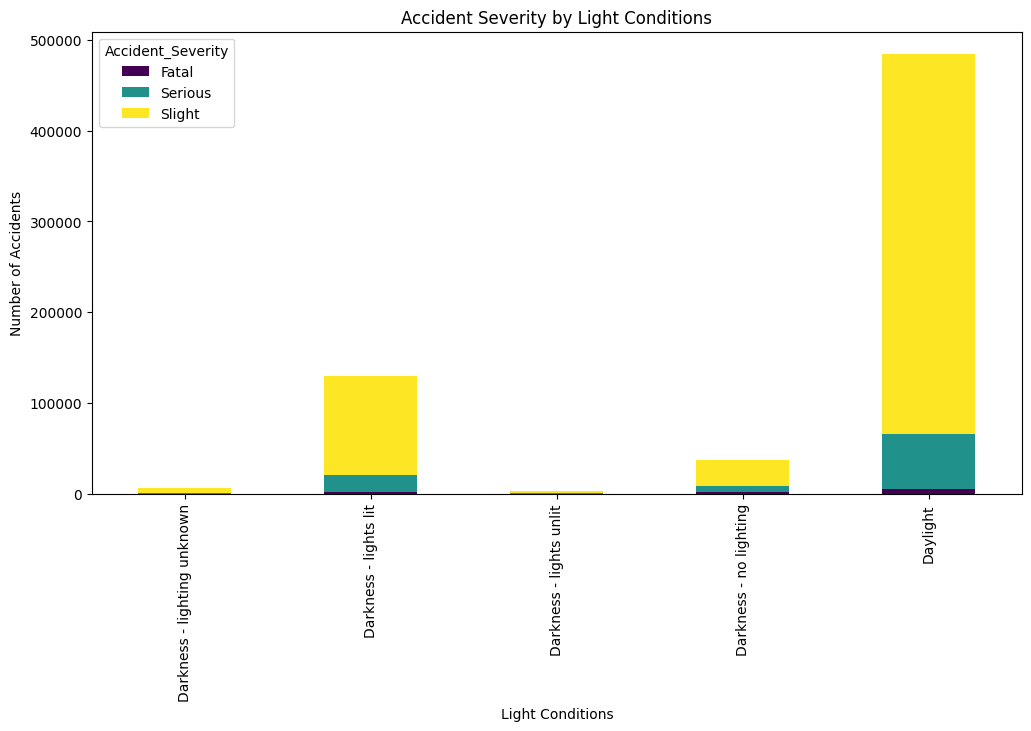

In [54]:

# Count accident severity by light conditions
severity_light = accidents.groupby(["Light_Conditions", "Accident_Severity"]).size().unstack()

# Plot severity by light conditions
plt.figure(figsize=(12, 6))
severity_light.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Light Conditions")
plt.xticks(rotation=90)
plt.show()


In [55]:
F_lc = accidents[accidents['Accident_Severity']=='Fatal']
Sr_lc = accidents[accidents['Accident_Severity']=='Serious']
Sl_lc = accidents[accidents['Accident_Severity']=='Slight']

In [56]:
F_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

In [57]:
Sr_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

In [58]:
Sl_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       419045
Darkness - lights lit          108345
Darkness - no lighting          28651
Darkness - lighting unknown      5622
Darkness - lights unlit          2138
Name: count, dtype: int64

<h2>Insight #7</h2>
<h3>As shown in this data, yes the light conditions affect the higher accident severity, and most of people think that in the night time has the highest accident severity, but as the data shown the highest rate in the 3 accident severity is the day time.  </h3>

 <h1>8# Is There any Correlation between the Number of Vehicles and Number of Casualties?</h1>

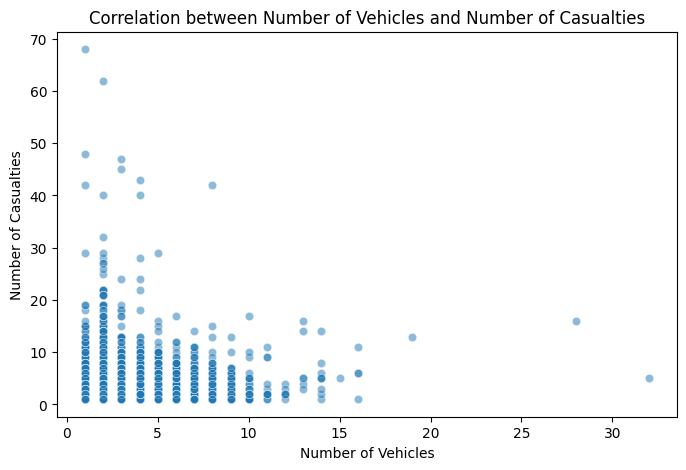

In [59]:

# Scatter plot for Number of Vehicles vs Number of Casualties
plt.figure(figsize=(8, 5))
sns.scatterplot(x=accidents["Number_of_Vehicles"], y=accidents["Number_of_Casualties"], alpha=0.5)
plt.xlabel("Number of Vehicles")
plt.ylabel("Number of Casualties")
plt.title("Correlation between Number of Vehicles and Number of Casualties")
plt.show()


In [60]:
as_noc = accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties'])

In [61]:
as_noc

np.float64(0.22888886126927635)

<h2>Insight #8</h2>
<h3>As shown in this data, There are no correlation between the number of vehicles and number of casualties. </h3>

<h1>9# Are wet road conditions associated with a higher number of accidents? and what type of accident severity does wet road conditions associated with?</h1>

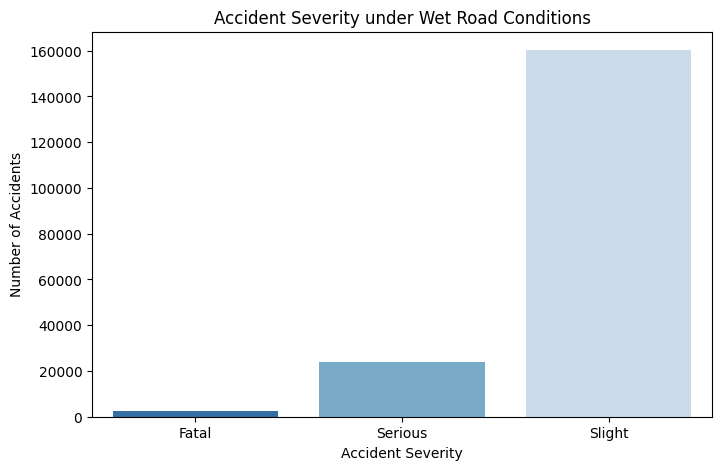

In [62]:

# Count accident severity for wet road conditions
wet_conditions = accidents[accidents["Road_Surface_Conditions"] == "Wet or damp"]["Accident_Severity"].value_counts()

# Plot accident severity for wet road conditions
plt.figure(figsize=(8, 5))
sns.barplot(x=wet_conditions.index, y=wet_conditions.values, palette="Blues_r")
plt.xlabel("Accident Severity")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity under Wet Road Conditions")
plt.show()


In [63]:
accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [64]:
wod = accidents[accidents['Road_Surface_Conditions']=='Wet or damp']

In [65]:
wod['Accident_Severity'].value_counts().nlargest(5)

Accident_Severity
Slight     160303
Serious     23785
Fatal        2620
Name: count, dtype: int64

<h2>Insight #9</h2>
<h3>As shown in this data, yes the wet road conditions associated with a higher number of accidents. And the highest number of accident severity that wet road conditions associated is the Slight severity accidents.  </h3>

<h1>10# Does the number of vehicles involved increase under specific weather conditions?</h1>

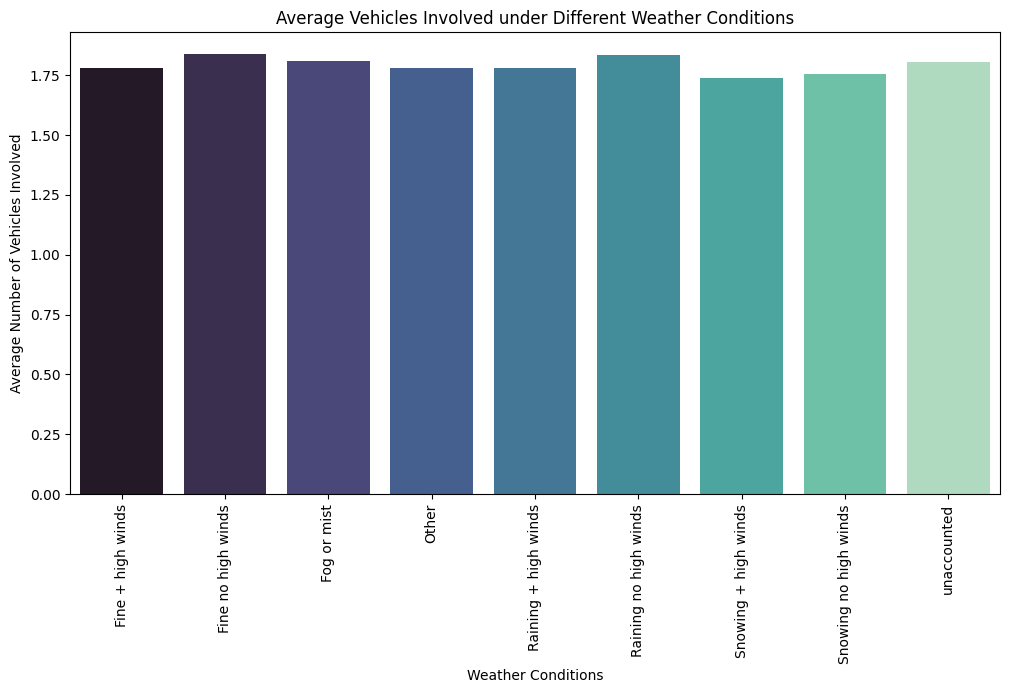

In [66]:

# Average number of vehicles per weather condition
weather_vehicles = accidents.groupby("Weather_Conditions")["Number_of_Vehicles"].mean().sort_values()

# Plot average vehicles per weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_vehicles.index, y=weather_vehicles.values, palette="mako")
plt.xticks(rotation=90)
plt.xlabel("Weather Conditions")
plt.ylabel("Average Number of Vehicles Involved")
plt.title("Average Vehicles Involved under Different Weather Conditions")
plt.show()


In [67]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [68]:
fnh = accidents[accidents['Weather_Conditions']=='Fine no high winds']
rnh = accidents[accidents['Weather_Conditions']=='Raining no high winds']
o = accidents[accidents['Weather_Conditions']=='Other']
u = accidents[accidents['Weather_Conditions']=='unaccounted']
rh = accidents[accidents['Weather_Conditions']=='Raining + high winds']
fh = accidents[accidents['Weather_Conditions']=='Fine + high winds']
snh = accidents[accidents['Weather_Conditions']=='Snowing no high winds']
f = accidents[accidents['Weather_Conditions']=='Fog or mist']
sh = accidents[accidents['Weather_Conditions']=='Snowing + high winds']

In [69]:
fnh['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    312245
1    155121
3     41632
4      8937
5      1942
Name: count, dtype: int64

In [70]:
rnh['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    46210
1    24814
3     6780
4     1420
5      296
Name: count, dtype: int64

In [71]:
f['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    1720
1    1388
3     298
4      75
5      25
Name: count, dtype: int64

In [72]:
snh['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    3172
1    2420
3     497
4     104
5      25
Name: count, dtype: int64

In [73]:
sh['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    412
1    383
3     59
4     20
5      4
Name: count, dtype: int64

<h2>Insight #10</h2>
<h3>As shown in the data no, the number of vehicles involved increase under specific weather conditions. Just like in the data above most accidents happen with 2 number of vehicles in the fine no high winds weather, just like the other result, it's always the 2 number of vehicles has the highest rate. </h3>

<h1>11# Which road surface conditions lead to the highest number of casualties?</h1>

In [74]:
accidents['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
16         7
19         7
18         6
22         5
21         4
29         3
28         2
42         2
24         2
40         2
27         2
47         1
26         1
48         1
32         1
45         1
62         1
68         1
25         1
43         1
Name: count, dtype: int64

In [75]:
accidents['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     448547
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [76]:
dc = accidents[accidents['Road_Surface_Conditions']=='Dry']
wc = accidents[accidents['Road_Surface_Conditions']=='Wet or damp']
frc = accidents[accidents['Road_Surface_Conditions']=='Frost or ice']
sc = accidents[accidents['Road_Surface_Conditions']=='Snow']
flc = accidents[accidents['Road_Surface_Conditions']=='Flood over 3cm. deep']

In [77]:
dc['Number_of_Casualties'].value_counts().nlargest(5)

Number_of_Casualties
1    348438
2     69527
3     19282
4      7020
5      2593
Name: count, dtype: int64

In [78]:
wc['Number_of_Casualties'].value_counts().nlargest(5)

Number_of_Casualties
1    136389
2     34013
3     10352
4      3736
5      1380
Name: count, dtype: int64

In [79]:
frc['Number_of_Casualties'].value_counts().nlargest(5)

Number_of_Casualties
1    14098
2     3169
3      793
4      289
5      108
Name: count, dtype: int64

In [80]:
sc['Number_of_Casualties'].value_counts().nlargest(5)

Number_of_Casualties
1    4407
2    1060
3     289
4      92
5      25
Name: count, dtype: int64

In [81]:
flc['Number_of_Casualties'].value_counts().nlargest(5)

Number_of_Casualties
1    709
2    202
3     60
4     19
5     17
Name: count, dtype: int64

<h2>Insight #11</h2>
<h3>The Road Surface that lead to highest number of casualties is the Dry Road Surface Conditions with 448,547 cases. This proves that it's not the bad road conditions causes high number of casualties. </h3>

<h1>12# Are accidents more common in poor weather conditions (e.g., fog, rain)?</h1>

In [82]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight #12</h2>
<h3>No, as Shown in this result, the accidents are more common in Good Weather Conditions. This resolve the thinking of the people that the accidents are more common on poor weather conditions.</h3>

<h1>13# Do more accidents occur in daylight or under artificial lighting?</h1>

In [83]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [84]:
accidents['Light_Conditions'].value_counts().idxmax()

'Daylight'

<h2>Insight #13</h2>
<h3> In this question, accidents do more occur in daylight than under artificial lighting, this answers the thinking of the people that most accidents occur in darkness or under artificial lighting. </h3>

<h1>14# Which Vehicle in Urban And Rural Area are most likely to have accident and Casualties involve?</h1>

In [85]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [86]:
ur = accidents[accidents['Urban_or_Rural_Area']=='Urban']
ru = accidents[accidents['Urban_or_Rural_Area']=='Rural']

In [87]:
ru.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean().idxmax()

('Minibus (8 - 16 passenger seats)', 'Fatal')

In [88]:
ur.groupby(['Vehicle_Type','Accident_Severity'])['Number_of_Casualties'].mean().idxmax()

('Goods over 3.5t. and under 7.5t', 'Fatal')

<h2>Insight #14</h2>
<h3>In rural area, the vehicle that most likely to have an accident and casualties involve is the minibus which has a capacity of 8-16 passenger. And in urban area, the vehicle that most likely to have an accident and casualties involve is the Goods over 3.5t. and under 7.5t. </h3>

<h1>15# Are nighttime accidents more severe compared to daytime accidents?</h1>

In [89]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [90]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [91]:
Ft_lc = accidents[accidents['Accident_Severity']=='Fatal']
Sr_lc = accidents[accidents['Accident_Severity']=='Serious']
Sl_lc = accidents[accidents['Accident_Severity']=='Slight']

In [92]:
Ft_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       5076
Darkness - lights lit          1860
Darkness - no lighting         1612
Darkness - lighting unknown      68
Darkness - lights unlit          45
Name: count, dtype: int64

In [93]:
Sr_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       60759
Darkness - lights lit          19130
Darkness - no lighting          7174
Darkness - lighting unknown      794
Darkness - lights unlit          360
Name: count, dtype: int64

In [94]:
Sl_lc['Light_Conditions'].value_counts().nlargest(5)

Light_Conditions
Daylight                       419045
Darkness - lights lit          108345
Darkness - no lighting          28651
Darkness - lighting unknown      5622
Darkness - lights unlit          2138
Name: count, dtype: int64

<h2>Insight #15</h2>
<h3>No, as shown in the data, Daylight accidents are more severe than nighttime accidents. You can see that in the 3 types of accident severity, the daylight has the most accident rate. </h3>

<h1>16# Which Vehicle cause most, Fatal accident, Serious accident and Slight accident?</h1>

In [95]:
Ftv = accidents[accidents['Accident_Severity']=='Fatal']
Srv = accidents[accidents['Accident_Severity']=='Serious']
Slv = accidents[accidents['Accident_Severity']=='Slight']

In [96]:
Ftv ['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     6577
Van / Goods 3.5 tonnes mgw or under      467
Motorcycle over 500cc                    339
Bus or coach (17 or more pass seats)     325
Goods 7.5 tonnes mgw and over            216
Name: count, dtype: int64

In [97]:
Srv ['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     66461
Van / Goods 3.5 tonnes mgw or under      4554
Motorcycle over 500cc                    3457
Bus or coach (17 or more pass seats)     3373
Goods 7.5 tonnes mgw and over            2321
Name: count, dtype: int64

In [98]:
Slv ['Vehicle_Type'].value_counts().nlargest(5)

Vehicle_Type
Car                                     424954
Van / Goods 3.5 tonnes mgw or under      29139
Bus or coach (17 or more pass seats)     22180
Motorcycle over 500cc                    21861
Goods 7.5 tonnes mgw and over            14770
Name: count, dtype: int64

<h2>Insight #16</h2>
<h3>As we see on the data, that the Vehicle type that has the highest accident severity whether it is Serios, Fatal, or Slight. This Shows that in United Kingdom accidents are more on Cars involved.</h3>

<h1>17# How does the number of vehicles involved in an accident vary based on road type?</h1>

In [99]:
accidents['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unknown                 4520
Name: count, dtype: int64

In [100]:
scrt = accidents[accidents['Road_Type']=='Single carriageway']
dcrt = accidents[accidents['Road_Type']=='Dual carriageway']
rrt = accidents[accidents['Road_Type']=='Roundabout']
owrt = accidents[accidents['Road_Type']=='One way street']
srrt = accidents[accidents['Road_Type']=='Slip road']
urt = accidents[accidents['Road_Type']=='unknown']

In [101]:
scrt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    287745
1    158224
3     37157
4      7206
5      1305
Name: count, dtype: int64

In [102]:
dcrt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    56455
1    25413
3    12185
4     3559
5     1046
Name: count, dtype: int64

In [103]:
rrt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    34971
1     6836
3     1935
4      205
5       32
Name: count, dtype: int64

In [104]:
owrt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
1    6598
2    6193
3     623
4     107
5      24
Name: count, dtype: int64

In [105]:
srrt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    4251
1    1868
3     679
4     173
5      44
Name: count, dtype: int64

In [106]:
urt['Number_of_Vehicles'].value_counts().nlargest(5)

Number_of_Vehicles
2    2380
1    1848
3     227
4      50
5      13
Name: count, dtype: int64

<h2>Insight #17</h2>
<h3> The number of vehicles involved in an accident can vary significantly based on the type of road due to factors such as speed limits, traffic density, road design, and driver behavior. However in this data we can see that most accidents occur in a single carraigeway and more of them is 2 vehicle only.</h3>

<h1>18# What road type is less likely and more likely to cause an accident?</h1>

In [107]:
accidents['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unknown                 4520
Name: count, dtype: int64

In [108]:
ra = accidents.groupby([ 'Road_Type', 'Road_Surface_Conditions','Accident_Severity']).size()
ra.unstack()

Accident_Severity                           Fatal  Serious  Slight
Road_Type          Road_Surface_Conditions                        
Dual carriageway   Dry                       1217     8104   56951
                   Flood over 3cm. deep         5       42     255
                   Frost or ice                36      259    2113
                   Snow                         6      108     795
                   Wet or damp                551     3233   25749
One way street     Dry                         74     1247    8779
                   Flood over 3cm. deep         0        3       2
                   Frost or ice                 0       15     168
                   Snow                         2        7      67
                   Wet or damp                 19      383    2793
Roundabout         Dry                        110     2640   28034
                   Flood over 3cm. deep         0        2      20
                   Frost or ice                 3       60     682
                   Snow                         2       12     218
                   Wet or damp                 27      951   11231
Single carriageway Dry                       4338    48926  279961
                   Flood over 3cm. deep        18      103     551
                   Frost or ice               153     1651   13114
                   Snow                        25      427    4133
                   Wet or damp               1993    18952  117798
Slip road          Dry                         30      419    4271
                   Flood over 3cm. deep         0        1       8
                   Frost or ice                 1       15     162
                   Snow                         0        9      51
                   Wet or damp                 18      167    1889
unknown            Dry                         21      372    3053
                   Flood over 3cm. deep         0        1       6
                   Frost or ice                 0        7      78
                   Snow                         0        2      26
                   Wet or damp                 12       99     843

In [109]:
ra.idxmax()

('Single carriageway', 'Dry', 'Slight')

In [110]:
ra.idxmin()

('One way street', 'Flood over 3cm. deep', 'Fatal')

<h2>Insight #18</h2>
<h3>The Road Type that most likely to cause an accidents is the ('Single carriageway', 'Dry', 'Slight'). And the Road Type that less likely to cause an accidents is ('One way street', 'Flood over 3cm. deep', 'Fatal').  </h3>

<h1>19# What Road type is less likely and more likely to cause casualties?</h1>


In [111]:
accidents.groupby('Road_Type')['Number_of_Casualties'].mean()

Road_Type
Dual carriageway      1.477279
One way street        1.192713
Roundabout            1.274891
Single carriageway    1.344666
Slip road             1.423661
unknown               1.248230
Name: Number_of_Casualties, dtype: float64

In [112]:
accidents.groupby('Road_Type')['Number_of_Casualties'].mean().idxmax()

'Dual carriageway'

In [113]:
accidents.groupby('Road_Type')['Number_of_Casualties'].mean().idxmin()

'One way street'

<h2>Insight #19</h2>
<h3>As we see in this data, the road type that most likely to cause casualties is the Dual Carriage road type. And the road type that less likely to cause casualties  is the One way street road type . </h3>

<h1>20# What District Area has the most rate and the least rate in terms of casualties ?</h1>


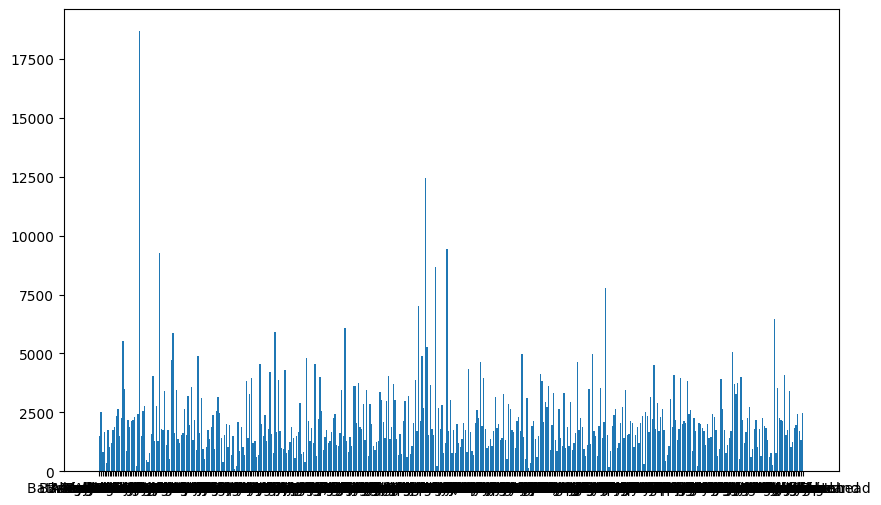

In [114]:
danc = accidents.groupby(['District Area'])['Number_of_Casualties'].sum().reset_index()

x = danc['District Area']
y = danc['Number_of_Casualties']
plt.bar(x,y)
plt.gcf().set_size_inches(10,6)
plt.show()

In [115]:
accidents.groupby('District Area')['Number_of_Casualties'].mean()

District Area
Aberdeen City    1.139834
Aberdeenshire    1.310363
Adur             1.319871
Allerdale        1.474291
Alnwick          1.512931
                   ...   
Wychavon         1.427627
Wycombe          1.412377
Wyre             1.378029
Wyre Forest      1.382869
York             1.293094
Name: Number_of_Casualties, Length: 422, dtype: float64

In [116]:
accidents.groupby('District Area')['Number_of_Casualties'].mean().idxmax()

'Blaeu Gwent'

In [117]:
accidents.groupby('District Area')['Number_of_Casualties'].mean().idxmin()

'City of London'

<h2>Insight #20</h2>
<h3>As we see in this data, the district area that most rate casualties is 'Blaeu Gwent'. And the district area that less rate casualties  is the 'City of London' . </h3>

<h1>MATPLOTLIB</h1>

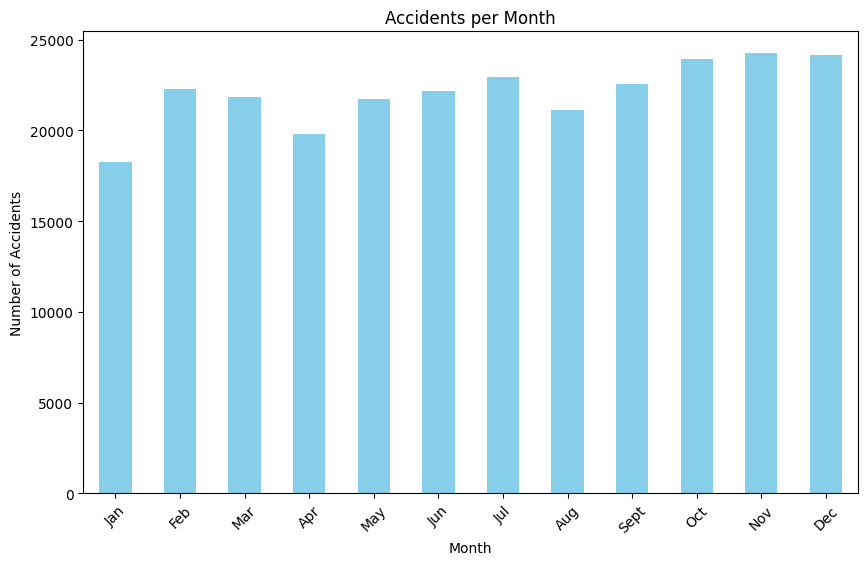

In [118]:
accidents['Month'] = accidents['Accident Date'].dt.month

apm = accidents.groupby('Month').size()

plt.figure(figsize=(10, 6))
apm.plot(kind='bar', color='skyblue')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(12), labels= [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

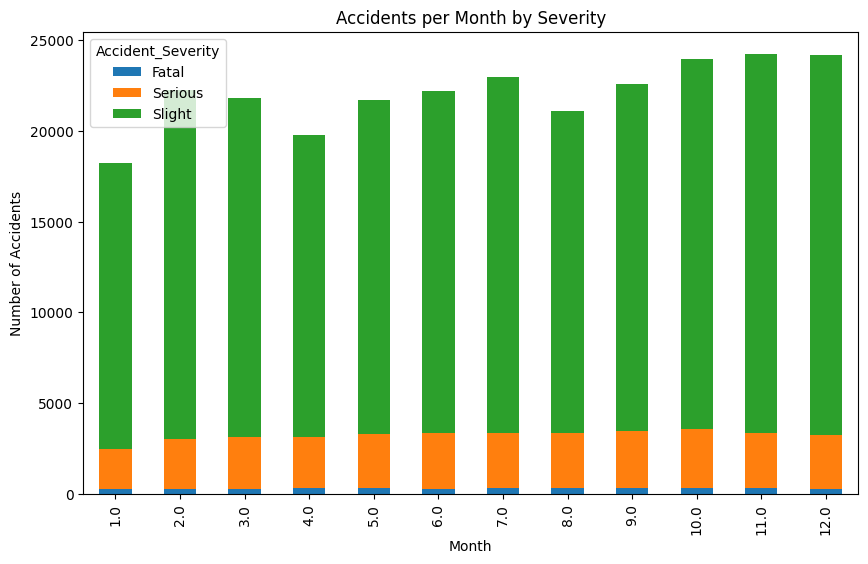

In [119]:
apms = accidents. groupby(['Month', 'Accident_Severity']).size().unstack().fillna(0)

apms.plot(kind='bar', stacked=True )
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(10,6)
plt.show()

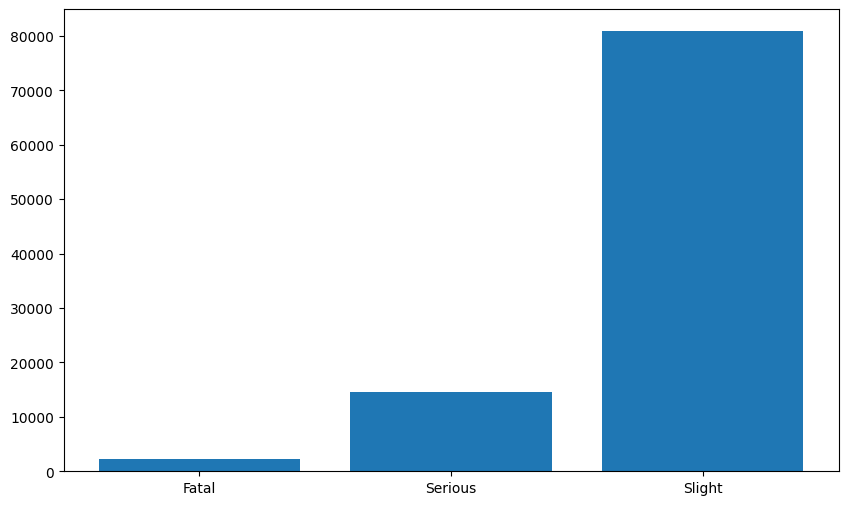

In [120]:
accidents['Year'] = accidents['Accident Date'].dt.year
df2019 = accidents[accidents['Year'] == 2019]

sc = df2019.groupby(['Accident_Severity'])['Number_of_Casualties'].sum().reset_index()

x = sc['Accident_Severity']
y = sc['Number_of_Casualties']
plt.bar(x,y)
plt.gcf().set_size_inches(10,6)
plt.show()

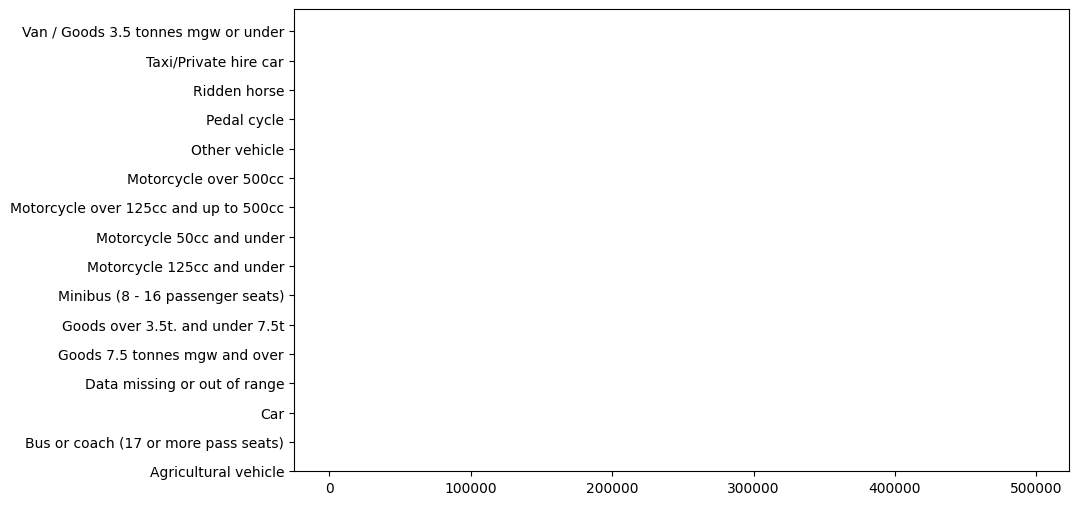

In [121]:
vtas = accidents.groupby(['Vehicle_Type'])['Number_of_Casualties'].size().reset_index()

x = vtas['Number_of_Casualties']
y = vtas['Vehicle_Type']

plt.bar(x,y)
plt.gcf().set_size_inches(10,6)
plt.show()

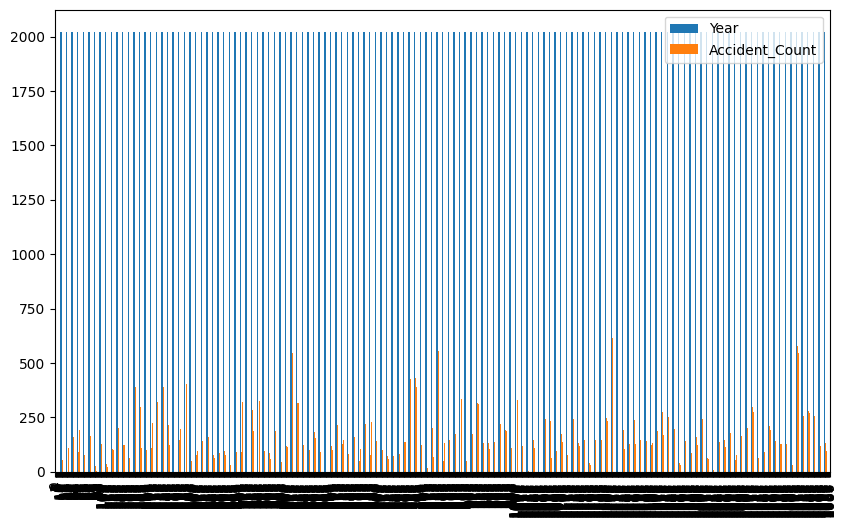

In [122]:
ya = accidents.groupby(['District Area', 'Year']).size().reset_index(name= 'Accident_Count')
ya.plot(kind='bar')
plt.gcf().set_size_inches(10,6)
plt.show()

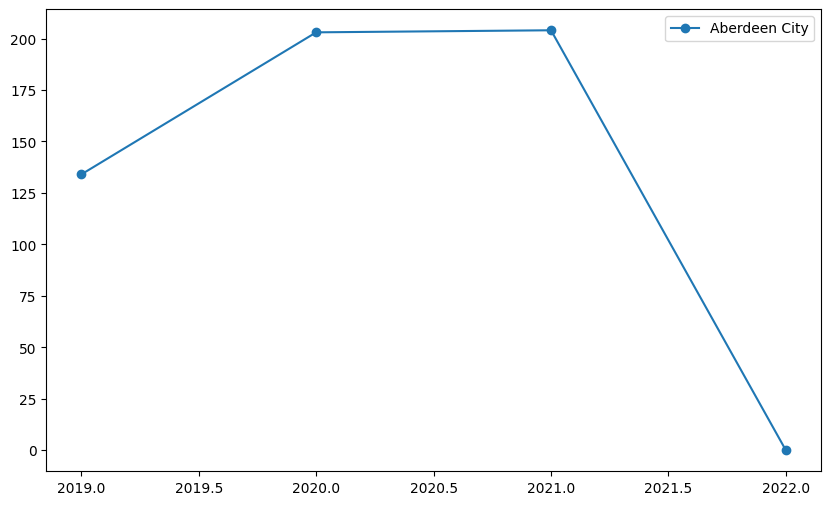

In [123]:
ya = accidents.groupby(['District Area', 'Year']).size().reset_index(name= 'Accident_Count')
edf = ya.pivot(index = 'Year', columns = 'District Area', values = 'Accident_Count')
plt.plot(edf.index, edf['Aberdeen City'], label = 'Aberdeen City', marker='o')
plt.legend()
plt.gcf().set_size_inches(10,6)
plt.show()

<h1>SEABORN</h1>

<h1>Visualizing Correlation</h1>

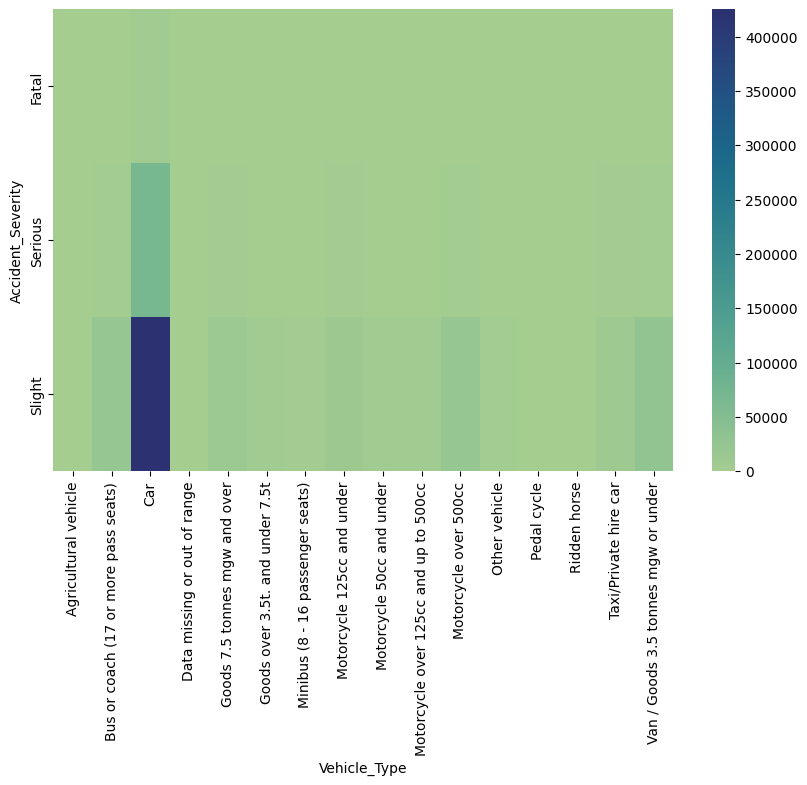

In [124]:
cv= accidents.groupby(['Accident_Severity', 'Vehicle_Type']).size().unstack()
sns.heatmap (cv, cmap='crest')
plt.gcf().set_size_inches(10,6)
plt.show()

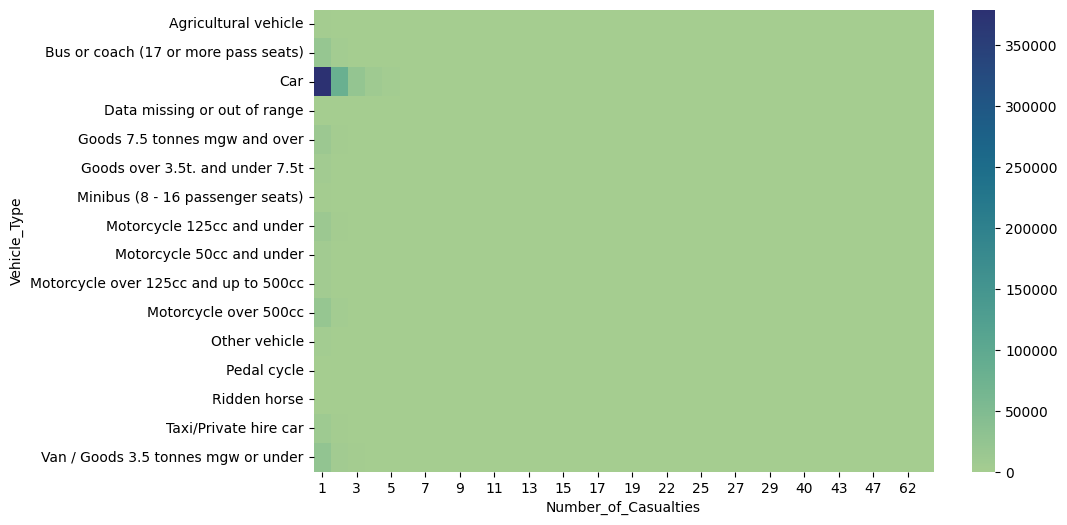

In [125]:
vtas = accidents.groupby(['Vehicle_Type','Number_of_Casualties']).size().unstack()
sns.heatmap (vtas, cmap='crest')
plt.gcf().set_size_inches(10,6)
plt.show()